<div id="WEEK 1 REPORT">
    <h2>Week 1 Report</h2>
    <div class="alert alert-block alert-info" style="margin-top: 20px">
        <ol>
            <li><a href="#">Ảnh được biểu diễn như thế nào</a></li>
            <li><a href="#">Chuyển ảnh màu về ảnh xám, chuyển ảnh xám về ảnh nhị phân</a></li>
            <li><a href="#">Phương pháp xử lý ảnh để detect cạnh</a></li>
        </ol>
    </div>
</div>



# 1. Biểu diễn ảnh số

Ảnh màu được biểu diễn bằng **3 ma trận riêng biệt** tương ứng với 3 kênh màu:

- **Kênh đỏ (Red channel)**
- **Kênh lục (Green channel)**
- **Kênh lam (Blue channel)**

Mỗi pixel trong ảnh màu có giá trị **(r, g, b)** với phạm vi từ **0-255** cho mỗi kênh.  


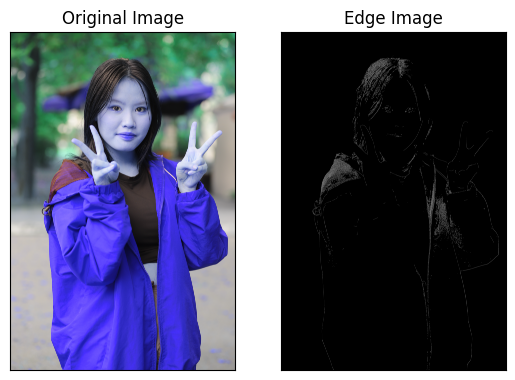

In [1]:
import cv2
import numpy as np
import requests
from matplotlib import pyplot as plt

image_path = "image.jpg"
img = cv2.imread(image_path)

edges = cv2.Canny(img, 100, 200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

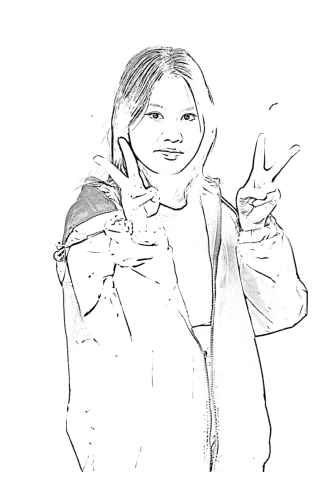

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Đọc ảnh gốc
image_path = "image.jpg"
image = cv2.imread(image_path)

# Chuyển ảnh sang grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Áp dụng adaptive threshold để làm rõ nét văn bản và loại bỏ ảnh hưởng của ánh sáng không đều
processed = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 85, 11)

# Tăng độ tương phản bằng cách sử dụng equalizeHist
processed = cv2.equalizeHist(processed)

# Áp dụng bộ lọc làm sắc nét để cải thiện độ rõ nét
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
sharpened = cv2.filter2D(processed, -1, kernel)

# Hiển thị ảnh kết quả
plt.figure(figsize=(10, 6))
plt.imshow(sharpened, cmap='gray')
plt.axis('off')
plt.show()

In [2]:
w_ij = (r_ij, g_ij, b_ij)

NameError: name 'r_ij' is not defined

# 2. Chuyển đổi ảnh màu sang ảnh xám

Sử dụng công thức trọng số :


In [ ]:
Độ sáng = 0.2989*R + 0.5870*G + 0.1140*B

Chuyển ảnh xám về ảnh nhị phân là một quá trình quan trọng trong xử lý ảnh, thường được thực hiện bằng cách áp dụng kĩ thuật ngưỡng(thresholding).

2.1 Thresholding Cố Định
Phương pháp này sử dụng một ngưỡng cố định cho toàn bộ ảnh. Các pixel có giá trị lớn hơn ngưỡng sẽ được gán giá trị 255 (đen), còn lại sẽ là 0 (trắng).

2.2 Thresholding Động
Phương pháp này tính toán ngưỡng cho từng vùng của ảnh, giúp xử lý tốt hơn với các ảnh có độ sáng không đồng đều.

Saved grayscale image @ grey_image.jpg
Saved binary image @ binary_image.jpg


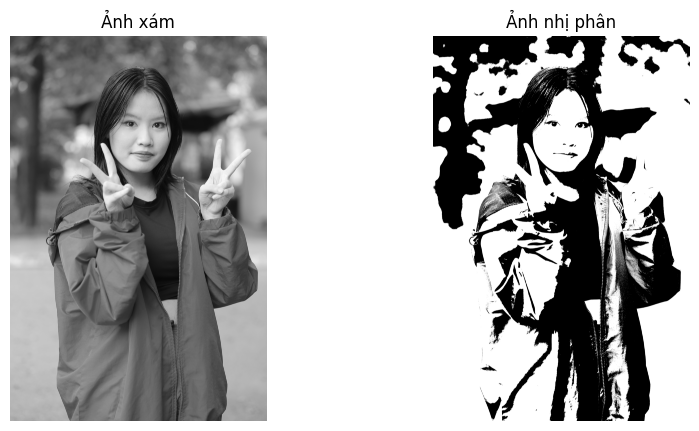

In [2]:
import os # Thư viện giúp kiểm tra file ảnh có tồn tại không
import cv2
import matplotlib.pyplot as plt #Dùng để hiển thị ảnh do jupyter không hỗ trợ cv2.imshow(())

def convert_to_binary(img_grayscale, thresh=100):
    _, img_binary = cv2.threshold(img_grayscale, thresh, 255, cv2.THRESH_BINARY)
    return img_binary

#  Đặt đường dẫn ảnh trực tiếp
input_image_path = "image.jpg"  

# Kiểm tra xem ảnh có tồn tại không
assert os.path.isfile(input_image_path), f'Image not found @ {input_image_path}'

# Đọc ảnh màu với flag IMREAD_GRAYSCALE
img_grayscale = cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE)

# Lưu ảnh grayscale (tuỳ chọn)
cv2.imwrite(f'grey_{input_image_path}', img_grayscale)
print(f'Saved grayscale image @ grey_{input_image_path}')

# Chuyển ảnh xám thành ảnh nhị phân
img_binary = convert_to_binary(img_grayscale, thresh=100)

# Lưu ảnh nhị phân (tuỳ chọn)
cv2.imwrite(f'binary_{input_image_path}', img_binary)
print(f'Saved binary image @ binary_{input_image_path}')

# Hiển thị ảnh bằng matplotlib
fig, axs = plt.subplots(1, 2, figsize=(10, 5)) #sắp xếp 2 ảnh trên cùng 1 hàng
# Tạo figure(Khung hiển thị ảnh)
axs[0].imshow(img_grayscale, cmap="gray")
axs[0].set_title("Ảnh xám")
axs[0].axis("off")

axs[1].imshow(img_binary, cmap="gray")
axs[1].set_title("Ảnh nhị phân")
axs[1].axis("off")

plt.show()






In [15]:
!pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 5.1 MB/s eta 0:00:00m eta 0:00:010:01:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 6.7 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.0/325.0 KB 97.1 kB/s eta 0:00:0031m94.6 kB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 2.9 MB/s eta 0:00:00m eta 0:00:010:00:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 5.4 MB/s eta 0:00:005.6 MB/s eta 0:00:01


Phương pháp xử lý ảnh để phát hiện cạnh, đường (Edge Detection)
Phương pháp xử lý ảnh để phát hiện cạnh, đường (Edge Detection) là một trong những bước quan trọng để nhận diện biên đối tượng ảnh
Cách 1 : Canny Edge Detection (Phát hiện cạnh Canny)
Cách 2 : Sobel Operation(Toán tử sobel)
Cách 3 : Toán tử Laplacian

Phương pháp 1 :  Canny Edge Detection (Phát hiện cạnh Canny)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Đọc ảnh gốc
image_path = "image.jpg"
image = cv2.imread(image_path)

# Chuyển ảnh sang grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Áp dụng adaptive threshold để làm rõ nét văn bản và loại bỏ ảnh hưởng của ánh sáng không đều
processed = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 85, 11)



# Tăng độ tương phản bằng cách sử dụng equalizeHist
processed = cv2.equalizeHist(processed)

# Áp dụng bộ lọc làm sắc nét để cải thiện độ rõ nét
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
sharpened = cv2.filter2D(processed, -1, kernel)

# Hiển thị ảnh kết quả
plt.figure(figsize=(10, 6))
plt.imshow(sharpened, cmap='gray')
plt.axis('off')
plt.show()



Cách 2 : Sobel Operation(Toán tử sobel)

In [ ]:
# Tính toán đạo hàm theo X và Y
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # Phát hiện cạnh theo chiều ngang
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Phát hiện cạnh theo chiều dọc

# Kết hợp cả hai
sobel_combined = cv2.magnitude(sobel_x, sobel_y)

# Hiển thị ảnh
plt.figure(figsize=(10,5))
plt.subplot(1,3,1), plt.imshow(sobel_x, cmap='gray'), plt.title('Sobel X')
plt.subplot(1,3,2), plt.imshow(sobel_y, cmap='gray'), plt.title('Sobel Y')
plt.subplot(1,3,3), plt.imshow(sobel_combined, cmap='gray'), plt.title('Sobel Combined')
plt.show()


Cách 3: Toán tử laplacionprint("Toán tử laplacion")

In [ ]:
laplacian = cv2.Laplacian(image, cv2.CV_64F)

plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian Edge Detection')
plt.show()


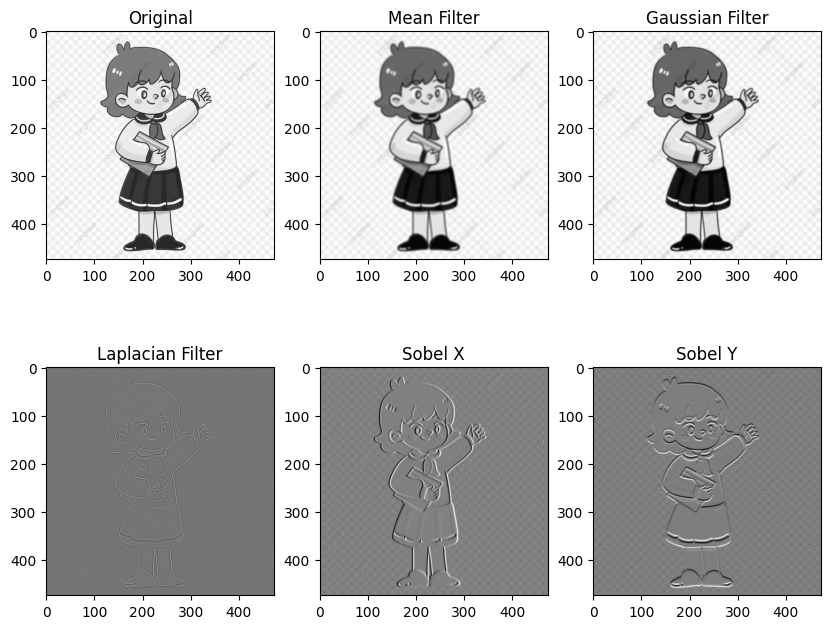

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đọc ảnh
img = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)

# Bộ lọc trung bình (Mean filter)
mean_kernel = np.ones((5, 5), np.float32) / 25
img_mean = cv2.filter2D(img, -1, mean_kernel)

# Bộ lọc Gaussian
img_gaussian = cv2.GaussianBlur(img, (5, 5), 0)

# Bộ lọc Laplacian (Làm sắc nét)
img_laplacian = cv2.Laplacian(img, cv2.CV_64F)

# Bộ lọc Sobel (Phát hiện cạnh)
img_sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
img_sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)

# Hiển thị ảnh
plt.figure(figsize=(10, 8))
plt.subplot(231), plt.imshow(img, cmap='gray'), plt.title('Original')
plt.subplot(232), plt.imshow(img_mean, cmap='gray'), plt.title('Mean Filter')
plt.subplot(233), plt.imshow(img_gaussian, cmap='gray'), plt.title('Gaussian Filter')
plt.subplot(234), plt.imshow(img_laplacian, cmap='gray'), plt.title('Laplacian Filter')
plt.subplot(235), plt.imshow(img_sobelx, cmap='gray'), plt.title('Sobel X')
plt.subplot(236), plt.imshow(img_sobely, cmap='gray'), plt.title('Sobel Y')

plt.show()
